In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
eyesdetector = cv2.CascadeClassifier("third-party/frontalEyes35x16.xml")
mostdetector = cv2.CascadeClassifier("third-party/Nose18x15.xml")

In [3]:
fullimg = cv2.imread("Jamie_Before.jpg")
fullimg = cv2.cvtColor(fullimg,cv2.COLOR_BGR2RGB)

In [4]:
overlay=cv2.imread("glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

mostache=cv2.imread("mustache.png",-1)
mostache=cv2.cvtColor(mostache,cv2.COLOR_BGRA2RGBA)

In [5]:
eyes = eyesdetector.detectMultiScale(fullimg,1.1,5)
eyes

array([[219, 349, 317, 145]], dtype=int32)

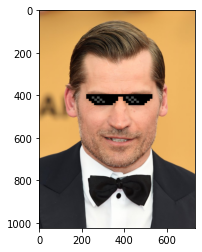

In [6]:
x,y,w,h=eyes[0]

overlay=cv2.imread("glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

overlay=cv2.resize(overlay,(w,h))

for i in range(overlay.shape[0]):
    for j in range(overlay.shape[1]):
        if(overlay[i,j,3]>0):
            fullimg[y+i,x+j,:]=overlay[i,j,:-1]

#     fullimg[y:y+w,x:x+h,:] = overlay[:,:,:]
plt.imshow(fullimg)

In [7]:
mts = mostdetector.detectMultiScale(fullimg,1.5,5)
mts

array([[309, 474, 137, 114]], dtype=int32)

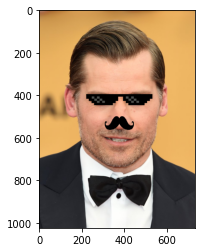

In [8]:
x,y,w,h=mts[0]

mostache=cv2.resize(mostache,(w,h))

for i in range(mostache.shape[0]):
    for j in range(mostache.shape[1]):
        if(mostache[i,j,3]>0):
            fullimg[y+i,x+j,:]=mostache[i,j,:-1]

# fullimg[y:y+w,x:x+h]=mostache[:,:,:]    
plt.imshow(fullimg)

In [9]:
fullimg = cv2.cvtColor(fullimg, cv2.COLOR_BGR2RGB)
cv2.imwrite("Jamie_After.jpg", fullimg)

True

In [10]:
fullimg = fullimg.reshape((-1,3))

In [11]:
fullimg.shape

(750592, 3)

In [12]:
df = pd.DataFrame(fullimg, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred.csv", index=False)